In [1]:
import numpy as np
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import ML_functions

In [2]:
data = pd.read_csv('multivariate.csv')
data = data.sort_values(by = "Label",ascending = False)
## Divide data into numerical data and label
status = pd.DataFrame(data["Label"])
data_df = pd.DataFrame(data.iloc[:,1:])
data_df.shape

(388, 337)

Remove Top 12 proteins and highly correlated proteins 

In [3]:
data_df = ML_functions.remove_depletion_protein(data_df)
highcorr  = []
data_df,highcorr = ML_functions.remove_highcorr(data_df)
data_df.insert(2,'P02745',data['P02745'])
data_df

32 columns will be removed
48 genes are found to be strongly correlated
(388, 261)


,B9A064,O00187,P02745,O00533,O14786,O14791,O15230,O43866,O76074,O95497,...,P32121,Q15910,Q6UX71,Q96EE4,P27487,Q13822,P04899,Q9UNN8,P30307,Label
194,8.621682,8.583763,10.925911,8.841914,8.798480,9.846299,10.016659,7.690461,9.471731,1.000000,...,1.000000,1.000000,8.355778,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,Pre
198,11.835369,8.207081,10.611160,8.243589,1.000000,10.502458,1.000000,8.947694,9.566605,1.000000,...,1.000000,1.000000,7.607551,8.976019,1.000000,1.000000,1.000000,1.000000,1.0,Pre
164,1.000000,9.468476,11.137568,9.087989,8.342981,10.162782,1.000000,9.111805,10.102304,9.444173,...,1.000000,1.000000,8.573684,8.929030,7.402838,9.021562,7.667542,1.000000,1.0,Pre
167,13.517015,9.168977,10.745017,8.384514,1.000000,10.114492,9.920516,7.575528,11.088720,8.847813,...,1.000000,1.000000,7.892095,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,Pre
174,15.485654,9.031232,11.103111,8.453298,1.000000,10.561401,9.517723,9.743798,10.075212,9.136354,...,10.268803,10.137243,8.127602,8.714242,1.000000,1.000000,1.000000,1.000000,1.0,Pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,1.000000,9.079979,9.802278,8.989743,1.000000,9.786801,9.652268,10.041407,9.192863,7.258868,...,1.000000,1.000000,1.000000,8.468551,1.000000,9.270313,5.988788,9.350832,1.0,Active Surveillance
222,11.597250,9.061052,10.086555,9.084673,1.000000,10.212270,1.000000,8.065993,9.886309,8.769607,...,1.000000,10.636905,7.939965,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,Active Surveillance
219,12.526395,9.121095,10.507741,9.327767,8.519525,9.979156,10.883747,11.662955,9.591059,8.916727,...,1.000000,1.000000,9.121197,1.000000,6.913922,9.113025,5.795173,1.000000,1.0,Active Surveillance
218,7.743628,8.690627,10.097516,9.318995,1.000000,9.952983,1.000000,8.374099,9.832619,9.535124,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,Active Surveillance


In [4]:
# Remove hihgly correlated 
highcorr  = []
data_df,highcorr = ML_functions.remove_highcorr(data_df)
## Reinsert a protein (complement factor), because P02745,P02746,P02748 
# are found to be important features, but they are all referred to complement factor 
#data_df.insert(2,'P02745',data['P02745'])

0 genes are found to be strongly correlated
(388, 262)


Convert label to numerical 

In [5]:
y,labels = ML_functions.convert_label_numerical(data_df)
X = np.asarray(data_df.iloc[:,:-1])
status["Label"]=y

Run RF for feature selection 

In [6]:
index_ = data_df.iloc[:,:-1].columns
feature_importances = ML_functions.RF_feature_selection(X,y,index_)
feature_importances[0:15]

,importances,ID
88,0.030910,P07996
2,0.014363,P02745
49,0.011018,P02751
120,0.010982,P18428
53,0.010699,P02766
89,0.010161,P08185
74,0.009908,P05154
55,0.009832,P02776
24,0.009470,P01019
202,0.008913,Q9BXR6


In [7]:
#Exclude immune set 
#selected_features_B = ['P07996', 'P18428', 'P02766', 'P01019', 'P08185',
 #      'P43251', 'P05154', 'P19652','P07737','P27169'] 

## With ANOVA test 
selected_features_B = ['P01375','P07996','P01019', 'P08185',
            'P02776','P05154','P27169','P02745']
#'Q9H4G4',

#Complete set
#selected_features_B = ['P07996', 'P18428', 'P02745', 'P02766', 'P01019', 'P08185',
#       'P02776', 'P43251', 'P05154', 'P19652','P07737']
data_RF = data_df[selected_features_B]
#'P27169'

t-SNE plot

In [8]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline
import seaborn as sns
from sklearn.manifold import TSNE
time_start = time.time()
sns.set_style('darkgrid')
#sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 1

t-SNE done! Time elapsed: 275.9902856349945 seconds
tsne shape:  (388, 2)
[[-12.31515    -5.033456 ]
 [ 37.938847  -11.396567 ]
 [-19.618473   -6.064248 ]
 [ 37.27917    -9.68168  ]
 [ -5.5869513 -12.1865635]]


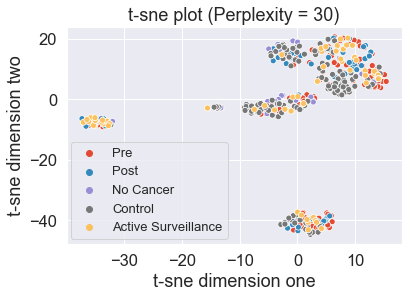

In [22]:
x_subset = data_RF.values
y_subset = status.values

tsne = TSNE(random_state=RS).fit_transform(x_subset)
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
print("tsne shape: ", tsne.shape)
print(tsne[0:5])
list_ = [30]

for i in list_:
 #  palette = sns.color_palette("bright", 5)
    tsne = TSNE(random_state=0,perplexity=i).fit_transform(x_subset)
    classes = list(data_df.Label)
    ax = sns.scatterplot(tsne[:,0],tsne[:,1],hue = classes, legend = 'full')
    ax.set_title(f"t-sne plot (Perplexity = {i})")
    ax.set_xlabel("t-sne dimension one")
    ax.set_ylabel("t-sne dimension two")
    plt.legend(bbox_to_anchor=(0.5,0.5) ,loc = "upper right",fontsize = 13)
    plt.show()

In [10]:
tsne = TSNE(random_state=0,perplexity=i).fit_transform(x_subset)
classes = list(data_df.Label)
tsne_pd = pd.DataFrame(tsne,columns = ['tsne1','tsne2'], index = data_df["Label"])
tsne_pd

,tsne1,tsne2
Label,,
Pre,8.821429,11.300312
Pre,1.171902,-39.708965
Pre,10.564900,19.014059
Pre,1.148787,-41.608292
Pre,14.389948,3.832488
...,...,...
Active Surveillance,3.448305,5.934015
Active Surveillance,1.870150,-43.170841
Active Surveillance,11.902268,5.423563


In [11]:
PVP = tsne_pd[tsne_pd.index.isin(['Pre','Post'])]
CVA = tsne_pd[tsne_pd.index.isin(['Control','Active Surveillance'])]
PVP

,tsne1,tsne2
Label,,
Pre,8.821429,11.300312
Pre,1.171902,-39.708965
Pre,10.564900,19.014059
Pre,1.148787,-41.608292
Pre,14.389948,3.832488
...,...,...
Post,-35.073349,-7.883453
Post,-2.880603,15.351291
Post,-0.965687,15.283937


In [12]:
PVP_tsne1 = PVP.tsne1.values
PVP_tsne2 = PVP.tsne2.values
classes_PVP = PVP.index.values
CVA_tsne1 = CVA.tsne1.values
CVA_tsne2 = CVA.tsne2.values
classes_CVA = CVA.index.values

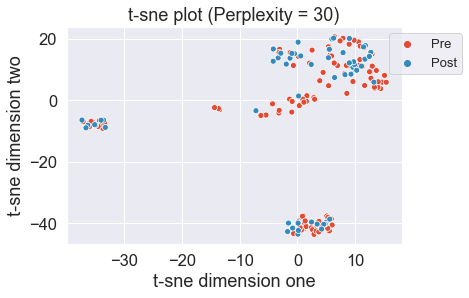

In [13]:
ax = sns.scatterplot(PVP_tsne1,PVP_tsne2,hue = classes_PVP, legend = 'full')
ax.set_title(f"t-sne plot (Perplexity = {i})")
ax.set_xlabel("t-sne dimension one")
ax.set_ylabel("t-sne dimension two")
plt.legend(bbox_to_anchor=(1.2,1) ,loc = "upper right",fontsize = 13)
plt.show()

In [14]:
cluster = PVP.loc[(PVP['tsne1'] > 0) & (PVP['tsne2']<10)]
print('The size of the cluster is: ',cluster.shape[0])
cluster[0:5]

The size of the cluster is:  69


,tsne1,tsne2
Label,,
Pre,1.171902,-39.708965
Pre,1.148787,-41.608292
Pre,14.389948,3.832488
Pre,1.501664,-40.994957
Pre,5.384525,4.790604


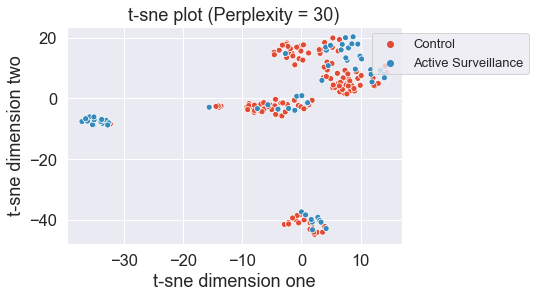

In [15]:
ax = sns.scatterplot(CVA_tsne1,CVA_tsne2,hue = classes_CVA, legend = 'full')
ax.set_title(f"t-sne plot (Perplexity = {i})")
ax.set_xlabel("t-sne dimension one")
ax.set_ylabel("t-sne dimension two")
plt.legend(bbox_to_anchor=(1.4,1) ,loc = "upper right",fontsize = 13)
plt.show()

In [16]:
cluster = CVA.loc[(CVA['tsne1'] > 0) & (CVA['tsne2']<10)]
print('The size of the cluster is: ',cluster.shape[0])
cluster[0:5]

The size of the cluster is:  75


,tsne1,tsne2
Label,,
Control,7.712925,5.508667
Control,7.202980,1.723097
Control,2.217491,-44.672527
Control,0.634957,-3.036969
Control,6.460732,2.176592


In [17]:
types = data_RF.index
tsne_pd = pd.DataFrame(tsne,columns = ['CVA_tsne1','CVA_tsne2'],index = types)
cluster = tsne_pd.loc[(tsne_pd['CVA_tsne1'] > 0) & (tsne_pd['CVA_tsne2']<10)]
print('The size of the cluster is: ',cluster.shape[0])
cluster[0:5]

The size of the cluster is:  149


,CVA_tsne1,CVA_tsne2
198,1.171902,-39.708965
167,1.148787,-41.608292
174,14.389948,3.832488
189,1.501664,-40.994957
1,5.384525,4.790604


### Backup

Pre vs Post

labels = selected_features_B[:10]
labels.append("Label")
data_pvp = data_df[labels]
data_pvp = data_pvp.loc[data_pvp["Label"].isin(["Pre","Post"])]
classes_pvp = list(data_pvp.Label)
data_pvp = data_pvp.drop("Label",axis = 1)
status_pvp = status.loc[status["Label"].isin(["2","3"])]

x_subset = data_pvp.values
y_subset = status_pvp.values
tsne = TSNE(n_components = 2).fit_transform(x_subset)
#print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
#print("tsne shape: ", tsne.shape)
list_ = [30]

for i in list_:
    #palette = sns.color_palette("bright", 2)
    tsne = TSNE(random_state=0,perplexity=i).fit_transform(x_subset)
    classes = list(data_df.Label)
    ax = sns.scatterplot(tsne[:,0],tsne[:,1],hue = classes_pvp, legend = 'full')
    ax.set_title(f"t-sne plot (Perplexity = {i})")
    ax.set_xlabel("t-sne dimension one")
    ax.set_ylabel("t-sne dimension two")
    plt.legend(bbox_to_anchor=(1.5,1) ,loc = "upper right",fontsize = 10)
    plt.show()

Control vs Active Surveilance

In [18]:
labels = selected_features_B[:10]
labels.append("Label")
data_pvp = data_df[labels]
data_pvp = data_pvp.loc[data_pvp["Label"].isin(["Control","Active Surveillance"])]
classes_pvp = list(data_pvp.Label)
data_pvp = data_pvp.drop("Label",axis = 1)
status_pvp = status.loc[status["Label"].isin(["0","1"])]

x_subset = data_pvp.values
y_subset = status_pvp.values
tsne = TSNE(n_components = 2).fit_transform(x_subset)
#print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
#print("tsne shape: ", tsne.shape)
list_ = [30]

for i in list_:
    #palette = sns.color_palette("bright", 2)
    tsne = TSNE(random_state=0,perplexity=i).fit_transform(x_subset)
    classes = list(data_df.Label)
    ax = sns.scatterplot(tsne[:,0],tsne[:,1],hue = classes_pvp, legend = 'full')
    ax.set_title(f"t-sne plot (Perplexity = {i})")
    ax.set_xlabel("t-sne dimension one")
    ax.set_ylabel("t-sne dimension two")
    plt.legend(bbox_to_anchor=(1.5,1) ,loc = "upper right",fontsize = 10)
    plt.show()

## Backup
palette = sns.color_palette("bright", 4)
ax = sns.scatterplot(tsne[:,0], tsne[:,1], hue=classes, legend='full', palette=palette)
ax.set_xlabel("t-sne dimension 1")
ax.set_ylabel("t-sne dimension 2")
plt.setp(ax.get_legend().get_texts(), fontsize='10')
plt.legend(bbox_to_anchor=(1.4,1) ,loc = "upper right",fontsize = 10)
plt.show()